# 📑 Evaluación de PubMedCLIP en ROCO

Este notebook forma parte del proyecto de tesis sobre **medición del balance multimodal en modelos CLIP aplicados a dominios médicos**.

**Modelo**: PubMedCLIP  
**Dataset**: ROCO (Radiology Objects in COntext)  
**Tarea**: ISA (Image-Sentence Alignment)

---

## Cargar modelos y datos

In [ ]:
import os
from pathlib import Path

# 📌 Configuración - Asegurar que estamos en el directorio correcto
# Funciona tanto en scripts como en notebooks
try:
    # En scripts Python
    PROJECT_ROOT = Path(__file__).parent.parent
except NameError:
    # En notebooks de Jupyter
    PROJECT_ROOT = Path.cwd()
    # Si estamos en experiments/, subir un nivel
    if PROJECT_ROOT.name == "experiments":
        PROJECT_ROOT = PROJECT_ROOT.parent

os.chdir(PROJECT_ROOT)
CFG_PATH = "configs/roco_isa_pubmedclip.yaml"

# Asegura que cfg, device, dataset y model estén listos en esta sesión
if not all(k in globals() for k in ("cfg", "device", "dataset", "model")):
    from mmshap_medclip.io_utils import load_config
    from mmshap_medclip.devices import get_device
    from mmshap_medclip.registry import build_dataset, build_model

    cfg = load_config(CFG_PATH)
    device = get_device()
    dataset = build_dataset(cfg["dataset"])
    model = build_model(cfg["model"], device=device)

print("OK → len(dataset) =", len(dataset), "| device =", device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


OK → len(dataset) = 8180 | device = cuda


## Ejecutar SHAP en una muestra

logit=30.8281  TScore=54.73%  IScore=45.27%


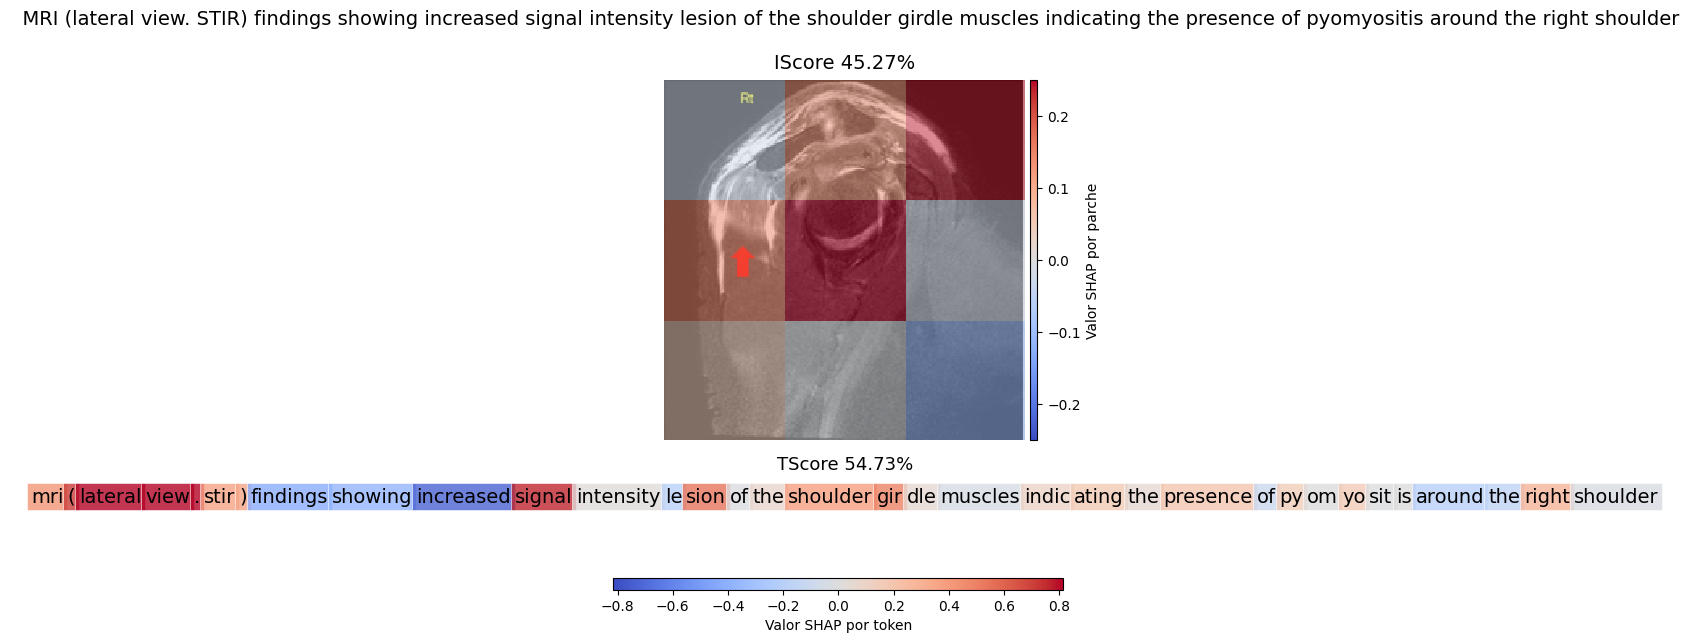

In [ ]:
# 📌 Código
from mmshap_medclip.tasks.isa import run_isa_one

muestra = 454
sample = dataset[muestra]
image, caption = sample['image'], sample['text']

res = run_isa_one(model, image, caption, device, explain=True, plot=True)
print(f"logit={res['logit']:.4f}  TScore={res['tscore']:.2%}  IScore={res['iscore']:.2%}")